In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#analysis questions
#how many people survived?
#how was age distributed among survivors?
#mean median mode of age of people who survived?
#did class affect survival rate?

In [14]:
#import csv
df = pd.read_csv("c:\projects\Titanic Project\Titanic-Dataset.csv")

In [15]:
#drop unneeded columns
#changed surived column type to change entries to Survived or Deceased

In [16]:
filtered_df = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Embarked', 'Cabin', 'Fare'],axis=1)
filtered_df['Survived'] = filtered_df['Survived'].astype(str)
filtered_df.replace({'0': 'Deceased', '1': 'Survived'},inplace=True)
filtered_df.head(10)

,Survived,Pclass,Sex,Age
0,Deceased,3,male,22.0
1,Survived,1,female,38.0
2,Survived,3,female,26.0
3,Survived,1,female,35.0
4,Deceased,3,male,35.0
5,Deceased,3,male,NaN
6,Deceased,1,male,54.0
7,Deceased,3,male,2.0
8,Survived,3,female,27.0
9,Survived,2,female,14.0


In [17]:
#add missing ages based on median age of class
filtered_df['Age'] = filtered_df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
filtered_df.head(10)

,Survived,Pclass,Sex,Age
0,Deceased,3,male,22.0
1,Survived,1,female,38.0
2,Survived,3,female,26.0
3,Survived,1,female,35.0
4,Deceased,3,male,35.0
5,Deceased,3,male,24.0
6,Deceased,1,male,54.0
7,Deceased,3,male,2.0
8,Survived,3,female,27.0
9,Survived,2,female,14.0


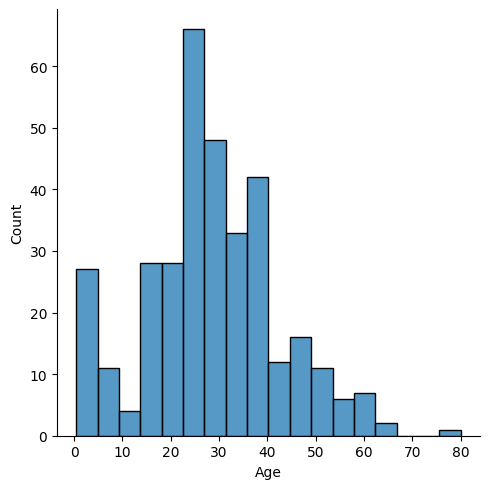

In [18]:
#distribution of age of survivors
sns.displot(filtered_df[filtered_df['Survived'] == 'Survived']['Age'])

In [19]:
#create a new DF of people who survived to analyse mean, median, mode of age and gender
survived = filtered_df[filtered_df['Survived'] == 'Survived']
amount = survived['Survived'].count()
mode = survived['Age'].mode()
mean = survived['Age'].mean()
median = survived['Age'].median()
print(f'Total Survivors: {amount}\nAge - Mean: {mean}, Median: {median}, Mode: {mode}')

Total Survivors: 342
Age - Mean: 28.27388888888889, Median: 27.0, Mode: 0    24.0
Name: Age, dtype: float64


In [20]:
#Table to show difference of survival based on gender
filtered_df.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
Deceased  female     81
          male      468
Survived  female    233
          male      109
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='Count'>

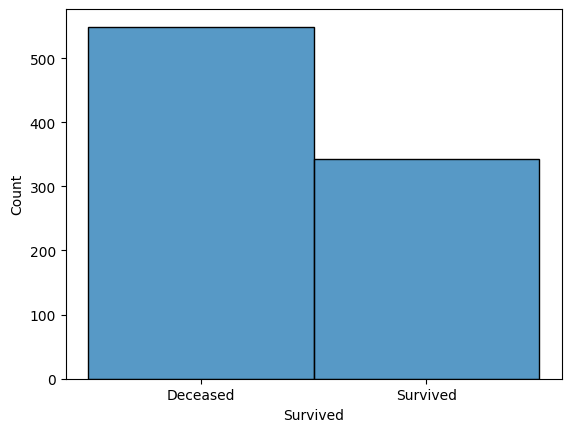

In [21]:
#Graph of Survived vs Deceased
sns.histplot(filtered_df['Survived'])

<Axes: xlabel='Survived', ylabel='count'>

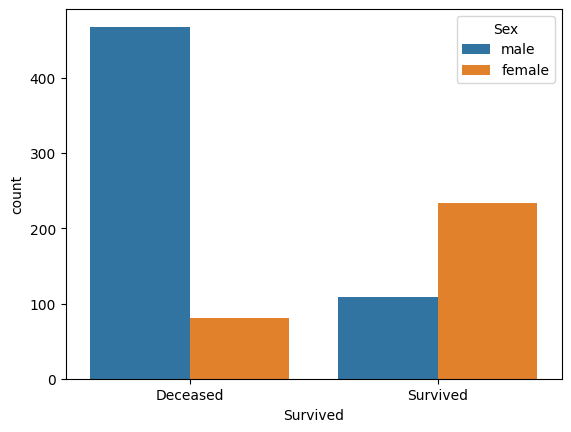

In [22]:
#Overlay gender into survival stats
sns.countplot(filtered_df, x='Survived', hue='Sex')

In [25]:
#create a new dataframe grouping survived classes and their count
class_survival = survived.groupby(['Pclass', 'Survived'])['Survived'].count()
class_survival

Pclass  Survived
1       Survived    136
2       Survived     87
3       Survived    119
Name: Survived, dtype: int64

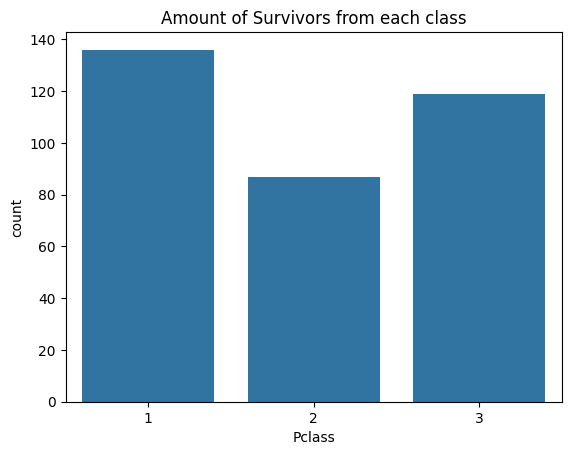

In [26]:
#Graph survival based off class
sns.countplot(survived, x='Pclass')
plt.title("Amount of Survivors from each class")
plt.show()

Summary:

There were 342 survivors. Their ages had a mean of ~28.3 years, median of 28, and mode of 24.

233 females survived compared to 109 males, showing a clear gender difference.

Most survivors were between ages 20–35, plus some children, as seen in the age distribution.

By class, 1st class passengers had the highest survival, followed by 3rd class, then 2nd class.